# Computer vision application for solving a board game
## Main tasks:
### -Find city centers and their coordinates using template matching technics
### -Sort empty cells and cells with train figure on them
### -Find the number of trains for each color

## Template matching for city centers detection

In [52]:
import cv2
import matplotlib.pyplot as plt
from skimage import io
from skimage.feature import match_template
import numpy as np
import json

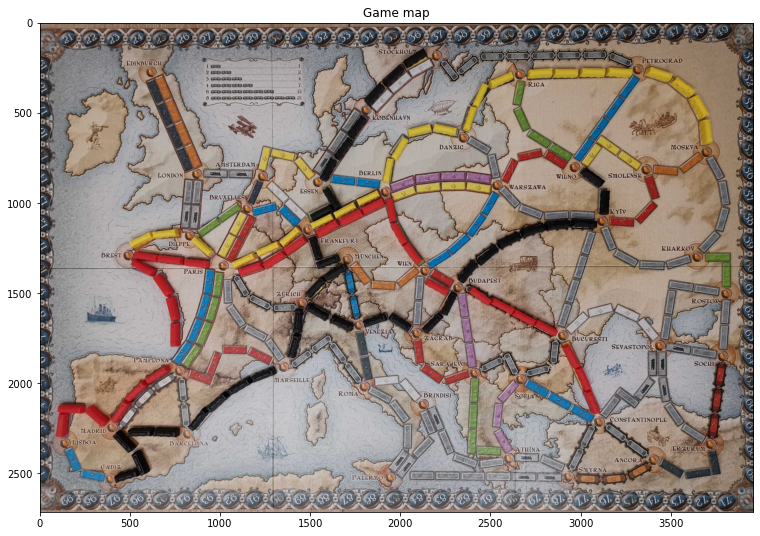

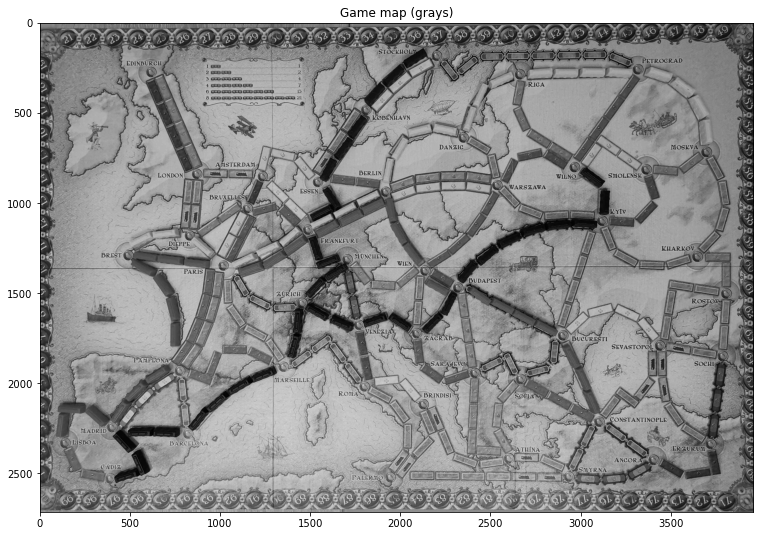

In [53]:
path_to_img = "project/train/black_red_yellow.jpg"
img = cv2.imread(path_to_img)
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

def plot_img(img, cmap='gray', title = ''):
    plt.figure(figsize=(14,9))
    plt.imshow(img, cmap=cmap)
    plt.axis('on')
    plt.title(title)
    plt.show()

plot_img(cv2.cvtColor(img, cv2.COLOR_BGR2RGB), title = 'Game map')
plot_img(img_gray, title = 'Game map (grays)')

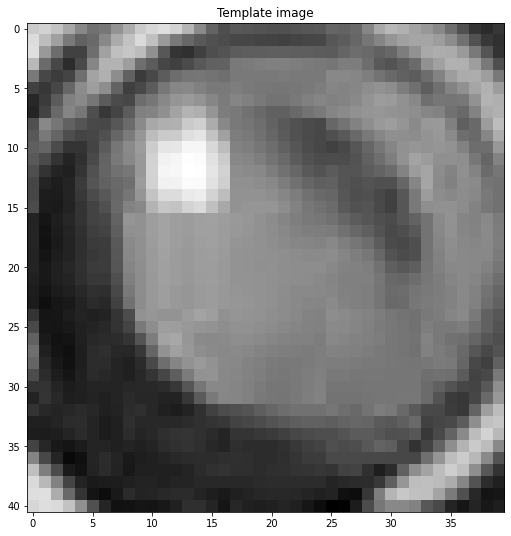

In [54]:
# City detection

img_temp = cv2.imread("project/train/all.jpg")
img_temp_gray = cv2.cvtColor(img_temp, cv2.COLOR_BGR2GRAY)
template = img_temp_gray[232:275,629:671] #template 3
template = img_temp_gray[1172:1213,502:542] #template 3

plot_img(template, title = 'Template image')

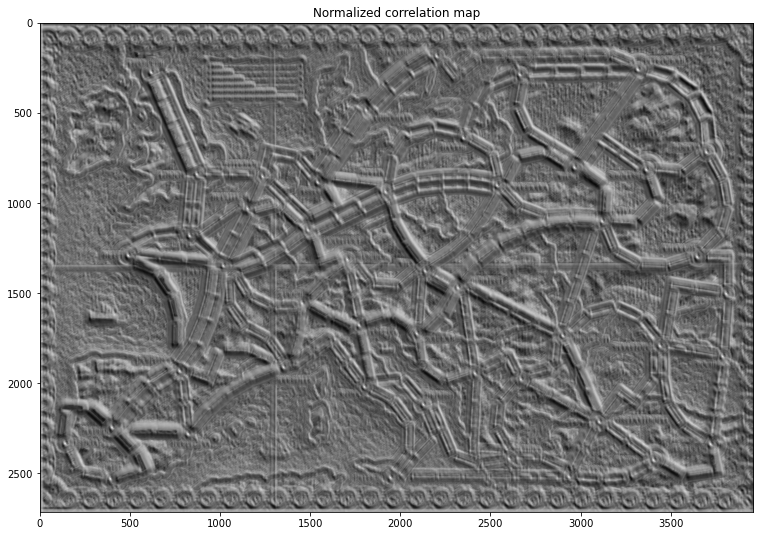

In [55]:
corr_cv2 = match_template(img_gray, template, pad_input=True)
plot_img(corr_cv2, title = 'Normalized correlation map')

In [56]:
from skimage.measure import label

# maximum -> center of mass
def get_local_centers(corr, th):
    lbl, n = label(corr >= th, connectivity=2, return_num=True)
    return np.int16([np.round(np.mean(np.argwhere(lbl == i), axis=0)) for i in range(1, n + 1)])


def plot_rectangles(img, points, bbox_shape):
    points = np.int16(points)[::, ::-1]
    res_img = np.int16(img)
    for pt in points:
        cv2.rectangle(res_img, (pt[0] - bbox_shape[0] // 2, pt[1] - bbox_shape[1] // 2),
                      (pt[0] + bbox_shape[0] // 2, pt[1] + bbox_shape[1] // 2), (255, 0, 0), 5)
    return res_img

In [57]:
from ipywidgets import IntSlider, interact

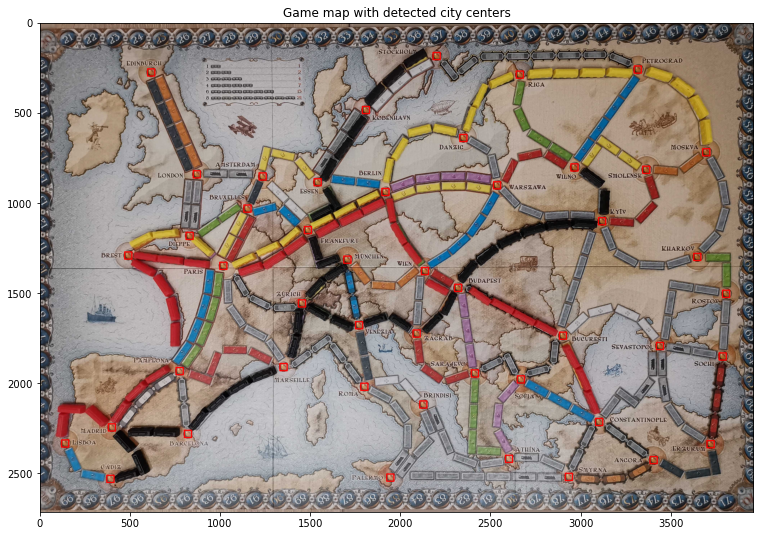

In [61]:
sld = IntSlider(value=50, min=0, max=100, step=1, continuous_update=False)

# Using thresholds
def vary_corr_th(th):
    points = get_local_centers(corr_cv2, th / 100)
    res = plot_rectangles(cv2.cvtColor(img, cv2.COLOR_BGR2RGB), points, template.shape)    
    plot_img(res, cmap=None, title='Game map with detected city centers')
vary_corr_th(72)

## Sorting empty cells and train figures

(-0.5, 3898.5, 2601.5, -0.5)

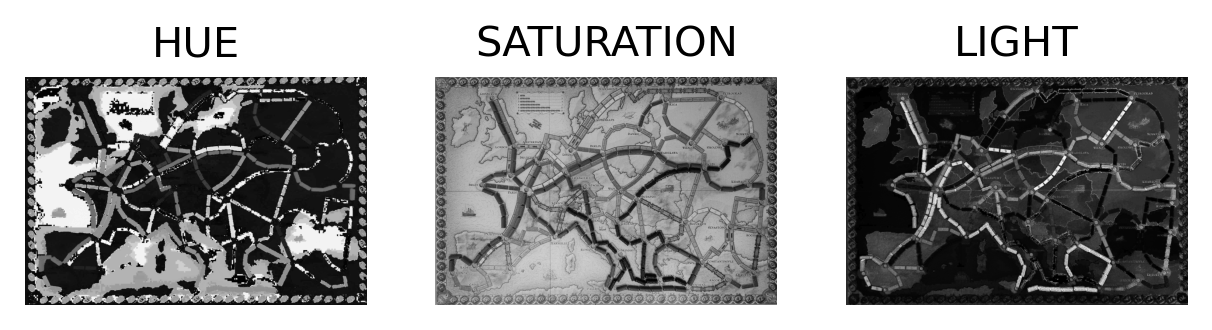

In [62]:
# COLORS
img = cv2.imread("project/train/black_blue_green.jpg")
img_RGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_HLS = cv2.cvtColor(img, cv2.COLOR_BGR2HLS)

HUE = img_HLS[:, :, 0]           
LIGHT = img_HLS[:, :, 2]
SAT = img_HLS[:, :, 1]

plt.figure(dpi=250)
plt.subplot(1,3,1)             
plt.imshow(HUE, cmap='gray')
plt.title('HUE')
plt.axis('off')
plt.subplot(1,3,2)
plt.imshow(SAT, cmap='gray')
plt.title('SATURATION')
plt.axis('off')
plt.subplot(1,3,3)
plt.imshow(LIGHT, cmap='gray')
plt.title('LIGHT')
plt.axis('off')


In [63]:
# Getting train cell squaires

green_unit_cell = img_RGB[230:280,2912:3035]
green_unit_square =  green_unit_cell.shape[0] * green_unit_cell.shape[1] 

black_unit_cell = img_RGB[1730:1844,1748:1785]
black_unit_square =  black_unit_cell.shape[0] * black_unit_cell.shape[1]

blue_unit_cell = img_RGB[1197:1228,686:805]
blue_unit_square =  blue_unit_cell.shape[0] * blue_unit_cell.shape[1] 

yellow_unit_cell = img_RGB[1332:1446,1030:1055]
yellow_unit_square =  yellow_unit_cell.shape[0] * yellow_unit_cell.shape[1]

red_unit_cell = img_RGB[1860:1978,2328:2360]
red_unit_square =  red_unit_cell.shape[0] * red_unit_cell.shape[1]

Number of train figures for each color:
- Green: 34
- Black: 31
- Blue: 45
- Yellow: 0
- Red: 0


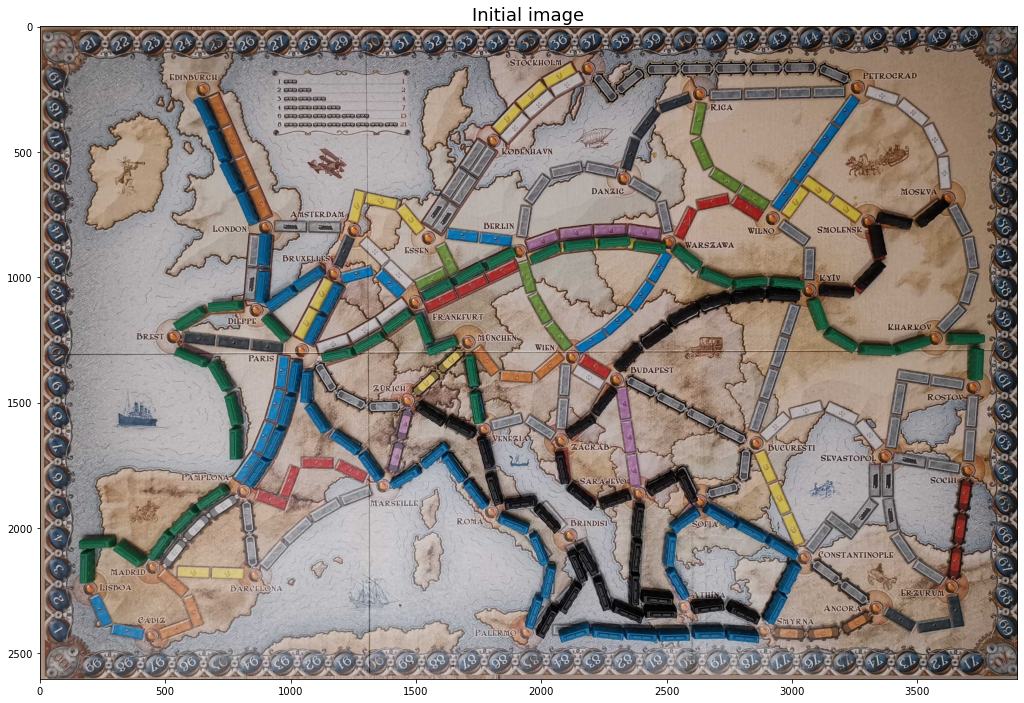

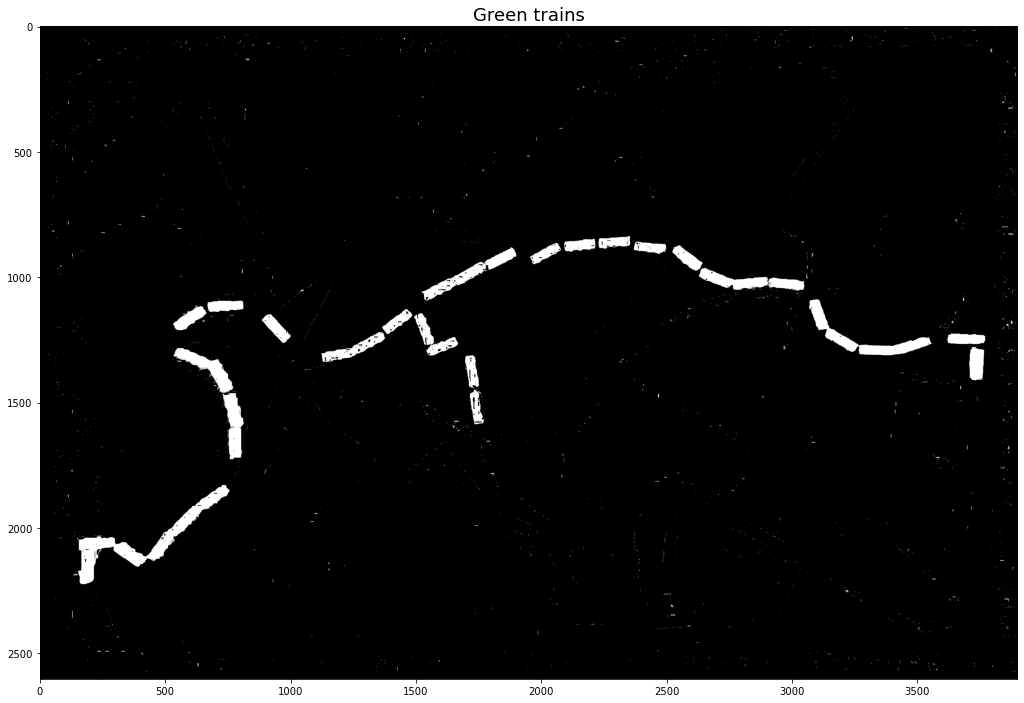

In [64]:
# Sorting train cells colors

mask_green = ((HUE >=65) & (HUE <=80))

mask_black = (HUE <=198) & (SAT <=26) &  (LIGHT <=46)

mask_blue =  ((HUE >=96) & (HUE <=130)) & ((SAT >=0) & (SAT <=89)) & ((LIGHT >=137) & (LIGHT <=245)) 

mask_yellow = ((HUE >=22) & (HUE <=63)) & ((SAT >=33) & (SAT <=255)) & ((LIGHT >=146) & (LIGHT <=255))  

mask_red = ((HUE >=150) & (HUE <=179)) & ((SAT >=21) & (SAT <=207)) & ((LIGHT >=133) & (LIGHT <=255))  

plt.figure(figsize=(18,12))
plt.title('Initial image', fontsize = 18)
plt.imshow(img_RGB)
plt.figure(figsize=(18,12)) 
plt.title('Green trains', fontsize = 18)
plt.imshow(mask_green, cmap="gray")

# Num of trains

green_n = np.uint32(np.floor(mask_green.sum()/(green_unit_square)))
black_n = np.uint32(np.floor(mask_black.sum()/(black_unit_square)))
blue_n = np.uint32(np.floor(mask_blue.sum()/(blue_unit_square)))
yellow_n = np.uint32(np.floor(mask_yellow.sum()/(yellow_unit_square)))
red_n = np.uint32(np.floor(mask_red.sum()/(red_unit_square)))

if (green_n < 20):
    green_n=0
if (black_n < 20):
    black_n=0
if (blue_n < 15):
    blue_n=0
if (yellow_n < 20):
    yellow_n=0
if (red_n < 20):
    red_n=0

print('Number of train figures for each color:')
print(f"- Green: {green_n}")
print(f"- Black: {black_n}")
print(f"- Blue: {blue_n}")
print(f"- Yellow: {yellow_n}")
print(f"- Red: {red_n}")

In [65]:
sld1_min = IntSlider(value=21, min=0, max=179, step=1, continuous_update=True)
sld1_max = IntSlider(value=173, min=0, max=179, step=1, continuous_update=False)
sld2_min = IntSlider(value=21, min=0, max=255, step=1, continuous_update=False)
sld2_max = IntSlider(value=255, min=0, max=255, step=1, continuous_update=False)
sld3_min = IntSlider(value=50, min=0, max=255, step=1, continuous_update=False)
sld3_max = IntSlider(value=169, min=0, max=255, step=1, continuous_update=False)


def vary_pipeline_th(th1_min,th1_max,th2_min,th2_max,th3_min,th3_max):
    mask = ((HUE >= th1_min) & (HUE <= th1_max))  & ((SAT >= th2_min) & (SAT <= th2_max)) & ((LIGHT >= th3_min)&(LIGHT <= th3_max))   
    plot_img(mask, cmap="gray", title = 'Thresholds playground')

In [66]:
interact(vary_pipeline_th, th1_min = sld1_min,th1_max=sld1_max,th2_min=sld2_min,th2_max=sld2_max,th3_min=sld3_min,th3_max=sld3_max);

interactive(children=(IntSlider(value=21, description='th1_min', max=179), IntSlider(value=173, continuous_upd…